In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual-Ascent workspace

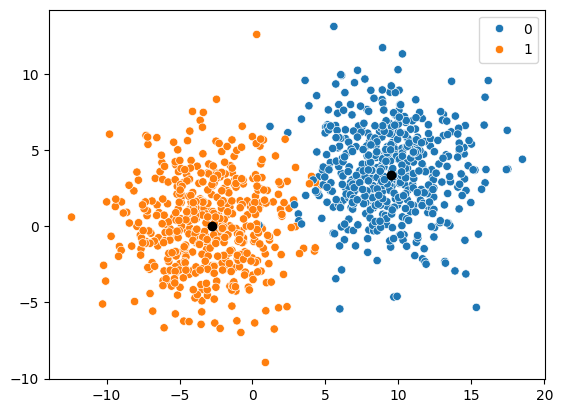

In [35]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [36]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,-10.202130,-2.558806,1.0
1,9.243032,4.351096,0.0
2,12.017445,0.902921,0.0
3,0.186700,0.976242,1.0
4,10.972938,2.748036,0.0
...,...,...,...
995,12.257577,-0.023775,0.0
996,-10.064777,-3.594452,1.0
997,10.698970,0.390679,0.0
998,14.060485,4.542850,0.0


In [37]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

Generation counterfacutal from cluster: 0.0 , Into cluster: 1.0
Amount of changes:  0
Number of changed features: 0


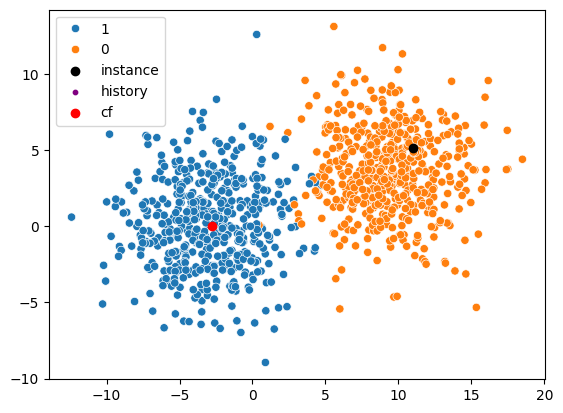

In [38]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()